# <center>Physiological Signals Processing</center>
## <center>Practice Unit 4: Evoked Potentials and Time-Frequency Analysis</center>
### <center>Rebeca Goya Esteban, Óscar Barquero Pérez and Miguel Ángel Cámara Vázquez</center>

Updated: 27th April 2020.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International license</a>.  

## Data

Once we have seen in the theory part what an **Evoked Potential (EP)** is and how to perform its analysis by using **statistical signal processing** techniques, we are going to perform a practice of analysis of this type of signals in **Python**.

To do this, we will use somatosensory EP data, which consists of an EEG signal sampled at 3200Hz that contains a total of 2840 stimuli. Each Somatosensory Evoked Potential (SEP) has a total duration of **80ms (i.e. 256 samples)**, of which 40ms precedes the stimulus and another 40ms follows. All EPs have been recorded concatenated into a single signal that contains 727040 samples. 

Furthermore, during the recording of EPs **a drug was administered after 1420 stimuli**, so the morphology of the signal may change after this particular stimulus, due to the effect of the drug.

These Somatosensory Evoked Potentials data have been provided by Professors Leif Sörnmo (Lund University, Sweden) and Pablo Laguna (University of Zaragoza).

## Exercise 1: loading and visualization of data

The first exercise of this practice consists on reading the EP data, which is in a CSV format text file. The aim is to identify the *numpy* function that will allow us to read the EP signal. Data is stored in the ***ep.csv*** text file.

Once the data is loaded, show the dimensions of the matrix created from the text file.

In [13]:
%matplotlib inline
import numpy as np

# Load EPs using np.loadtxt.
ep = np.loadtxt('ep.csv')

# Print data size.
print('Data size: ', ep.shape)

Data size:  (727040,)


What is the first thing we should do once we have the data loaded? **Study the morphology of the signal**. To do this, make a **plot** of the variable **ep**, taking into account the signal sampling frequency to display it **in the time domain**.

**Would you make any modifications to observe the signal in more detail?**

(0, 0.8)

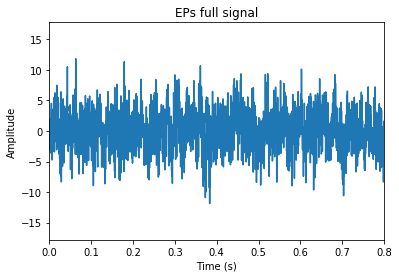

In [14]:
import matplotlib.pyplot as plt

# Store the sampling frequency (3200Hz)
fs = 3200

# Create the times vector for the signal
t = np.arange(0,len(ep))/fs

# Plot of the whole EP signal
plt.figure()
plt.plot(t,ep)
plt.title('EPs full signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0,0.8)

## Exercise 2: Implementation of the ML estimator

### Noise reduction
We have three main objectives in this practice:
1. To obtain the **ML estimator** of the evoked potential.
2. To verify the **evolution of the evoked potential** throughout the study.
3. Compare the evoked potential before and after the administration of the drug.

At this point it is worth recalling **how the ML estimator was obtained**, under the assumption of independent and identically distributed (i.i.d.) samples, with an **added noise** following a **Gaussian distribution of mean 0 and variance $\sigma^2$**: 

$$p(\boldsymbol{v_i}) \sim \mathcal{G}(0,\sigma^2)$$

Therefore, the signal model would look like this:

$$x_i(n) = s(n) + v_i(n)$$

Under these assumptions, **the ML estimator $\hat{\textbf{s}}_{ML}$ of the EP turns out to be** (at this point it would be convenient for the student to reread the subject notes):

$$\hat{\textbf{s}}_{ML} = \frac{1}{M}\sum^{M}_{i=0}\textbf{x}_i$$

where $\textbf{x}_i$ is each one of the EPs, and $M$ is the number of EPs.

In this section the student should obtain the ML estimator of the evoked potential for a different size set of SEPs. To do this, it is necessary to **separate each of the evoked potentials from the whole signal**.

### Exercise 2.1
In this step the student should obtain a matrix with as many rows as SEPs are requested, and as many columns as the size of each SEP (256 samples). To do this, it is recommended to use the ***reshape*** function of *numpy*. **What does this function do? What parameters does it require?**

You have to perform this process for different number of episodes: 10, 25, 50, 100 and 200.

What is the first thing we should do when we have the matrix to work with? **Plots the resulting signals**.

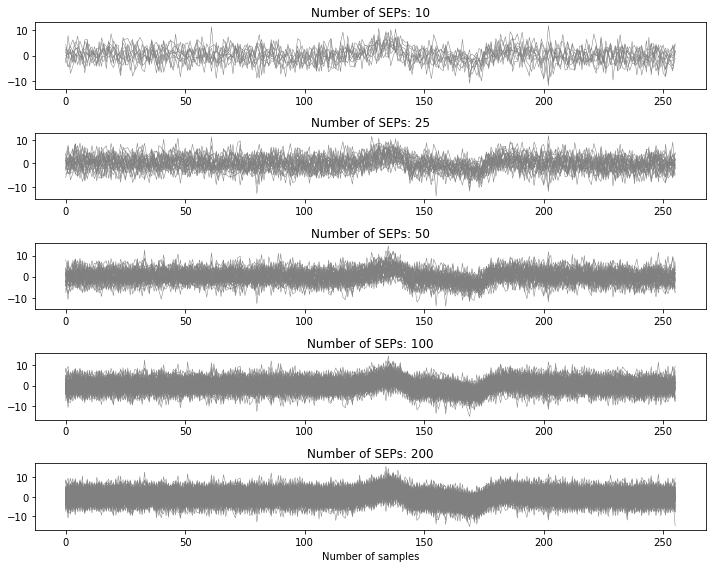

In [15]:
# Create a list with the number of EPs that we are going to store.
num_epi = [10,25,50,100,200]
num_sample_epi = 256     # Lenght of each EP.

# Initialize the list where the EPs will be stored. Each position of the list
# will store a different number of EPs (given by num_epi).
epi_diff_sizes = []

for k in num_epi:
    # Reshape the signal to a NxM matrix (N: number of EPs, M=256)
    # WARNING: we are going to reshape a subsection of the signal on each iteration
    # (the equivalent to the number of wanted EPs).
    aux_epi = np.reshape(ep[0:num_sample_epi*k],(k,256))
    epi_diff_sizes.append(aux_epi)
    
# Plots for each number of SEPs
plt.figure(figsize = (10,8))

for k in range(len(num_epi)):
    plt.subplot(len(num_epi),1,k+1)
    plt.plot(epi_diff_sizes[k].T,color='gray',linewidth=0.5)
    plt.title('Number of SEPs: %d' %num_epi[k])
plt.xlabel('Number of samples')
plt.tight_layout()

### Exercise 2.2

Once we have the different SEPs organized properly, there is nothing left to do but to obtain the ML estimate from the data we have. 

We are asked to **obtain the ML estimator for the different numbers of SEPs specified in the previous section**. Plot the different solutions and analyze the results.

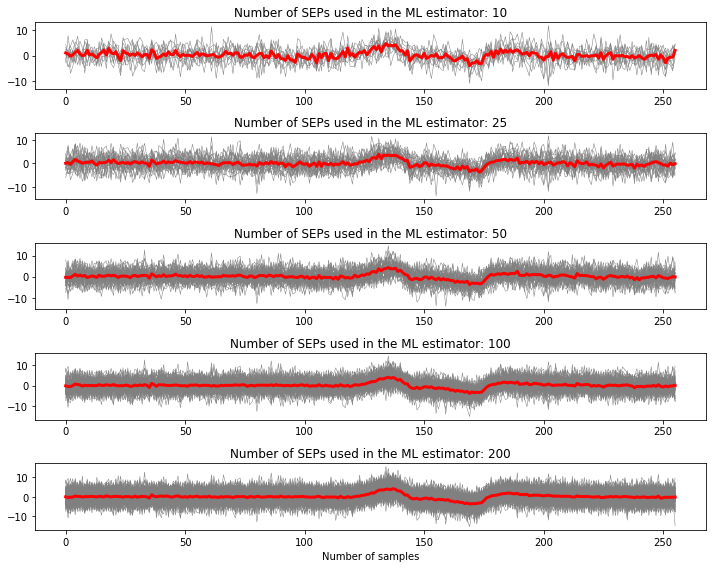

In [16]:
# # Initialize the list where the ML estimator will be stored.
s_ml = []

for k in range(len(num_epi)):
    # For each position of the epi_diff_sizes list, we compute the mean of its stored SEPs.
    aux_s_ml = np.mean(epi_diff_sizes[k], axis = 0)
    s_ml.append(aux_s_ml)
    
# Plot the different estimations
plt.figure(figsize = (10,8))

for k in range(len(num_epi)):
    plt.subplot(len(num_epi),1,k+1)
    plt.plot(epi_diff_sizes[k].T,color='gray',linewidth=0.5)
    plt.plot(s_ml[k],color = 'red',linewidth = 3)
    plt.title('Number of SEPs used in the ML estimator: %d' %num_epi[k])
plt.xlabel('Number of samples')
plt.tight_layout()

### Exercise 2.3

In this section we will **compare the stimulus before and after the administration of the drug**. To do this we will use all the available SEPs, before and after, to perform the filtering. 

To do this, **obtain the ML estimator for the whole set of SEPs we have before and after administering the drug, and represent the results**. Here we take advantage of the properties of the estimator, under the assumptions of the model: unbiased and consistent in variance. **What is the effect of the drug on the SEPs?**

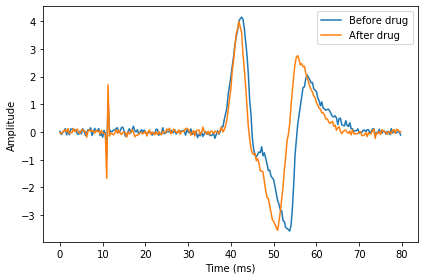

In [17]:
# Get all the available SEPs, each in a row, before and after the drug administration.
aux_seps_pre = np.reshape(ep[0:1420*256],(1420,256)) # We have 1420 SEPs before the drug administration.
aux_seps_post = np.reshape(ep[1420*256:],(1420,256)) # The rest of the SEPs correspond to the EPs after the drug administration.

# Times vector for a single SEP (256 samples), in miliseconds.
t_singleEP = (np.arange(256)/fs)*1000

# Compute the ML estimator for both sets.
sep_ml_before = np.mean(aux_seps_pre,axis = 0)
sep_ml_after = np.mean(aux_seps_post,axis = 0)

# Plots
fig = plt.figure()
plt.plot(t_singleEP,sep_ml_before)
plt.plot(t_singleEP,sep_ml_after)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.legend(['Before drug','After drug'])
plt.tight_layout()

## Exercise 3: Filtering Individual Evoked Potentials

So far we have used a statistical signal processing approach in which we model the observed EP as the sum of a deterministic part (which is the target) and a white Gaussian noise. However, in this section we are going to use the knowledge of **spectral estimation and filter design** to filter the signals. 

To do this, we must first analyze the frequency band in which the EP information is located. To make the spectral estimation as reliable as possible you should use an EP estimator with a high number of observations, in order to remove as much noise as possible.

You should obtain the **PSD both before the drug and after the drug administration**, in order to check if the use of the drug changes the frequency characteristics. You can use the estimators calculated in Exercise 2.3 for this purpose.

Once we known in which frequency bands the EP information is located, we should **design a filter** with the objective of removing noise in a single observation. That is to say, we will put ourselves in the situation that only one stimulus has been generated, and therefore only one EP has been recorded which we will filter. 

The purpose is to check if, having knowledge of the frequency distribution of the EP information, the filter design techniques are comparable to the use of an ML estimator.

### Exercise 3.1. Spectral estimation of the ML estimator

In this exercise, the student should use one of the **spectral estimation** methods that they have seen in **Exercise 2** to obtain the PSD estimatation, which will be obtained from the SEP ML estimator, before and after drug administration. Repeat the same procedure with an individual SEP from each group. **Which frequency bands contain the EP signal information?**

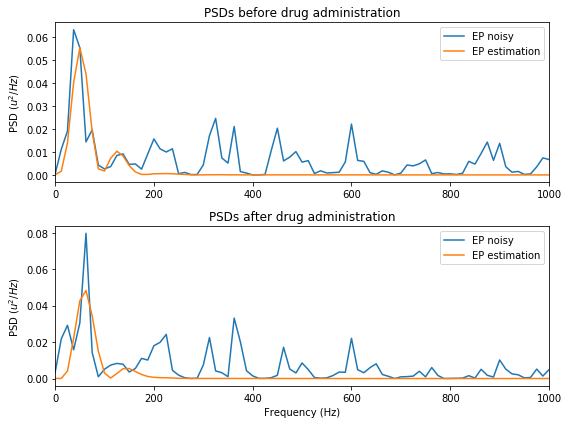

In [18]:
import scipy.signal as sg

# Obtain one single noisy SEP to filter
ep_ind_before = aux_seps_pre[0]
ep_ind_after = aux_seps_post[0]

# Compute the PSD of both noisy SEPs
f,P_ind_before = sg.welch(ep_ind_before, window='hamming', fs=fs)
_,P_ind_after = sg.welch(ep_ind_after, window='hamming', fs=fs)

# Compute the PSD of the ML estimations
_,P_ML_before = sg.welch(sep_ml_before, window='hamming', fs=fs)
_,P_ML_after = sg.welch(sep_ml_after, window='hamming', fs=fs)

# Plots
plt.figure(figsize = (8,6))
plt.subplot(211)
plt.plot(f,P_ind_before)
plt.plot(f,P_ML_before)
plt.xlim(0,1000)
plt.ylabel(r'PSD ($u^2/Hz$)')
plt.title('PSDs before drug administration')
plt.legend(['EP noisy','EP estimation'])
plt.subplot(212)
plt.plot(f,P_ind_after)
plt.plot(f,P_ML_after)
plt.xlim(0,1000)
plt.legend(['EP noisy','EP estimation'])
plt.title('PSDs after drug administration')
plt.ylabel(r'PSD ($u^2/Hz$)')
plt.xlabel('Frequency (Hz)')
plt.tight_layout()

### Exercise 3.2. Filter design

In this exercise we will design a filter that **keeps only the frequency band where the EP information is located**. To do this, follow the steps set out in the following points.

#### 3.2.1. FIR and IIR filter design
Design at least **two different filters**, one **FIR** and one **IIR**, to compare the results. In the Filter Design section of [Scipy Signal](https://docs.scipy.org/doc/scipy/reference/signal.html) you can find all the necessary functions for filter design.

Also represent the **frequency and phase response** of the filters using the [freqz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html) function.

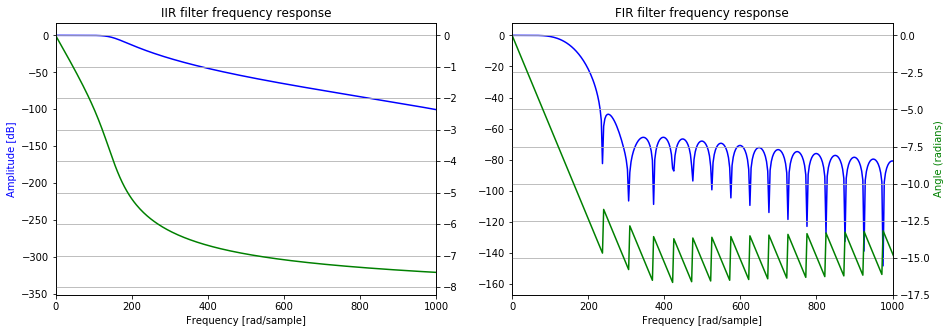

In [19]:
# Set de cutoff frequency.
f_cut = 150

# FIR filter design
numtaps = 64       # Filter length
fir_filter = sg.firwin(numtaps, f_cut, fs=fs)    # Create FIR lowpass filter

# IIR filter design
b_IIR, a_IIR = sg.butter(5, f_cut, btype='lowpass', fs=fs)    # Create IIR lowpass filter

# FIR filter response
w_FIR, h_FIR = sg.freqz(fir_filter, fs=fs)

# IIR filter response
w_IIR, h_IIR = sg.freqz(b_IIR, a_IIR, fs=fs)

# Plots of the filter response
plt.figure(figsize=[15,5])
ax1 = plt.subplot(121)
ax1.set_title('IIR filter frequency response')
ax1.plot(w_IIR, 20 * np.log10(abs(h_IIR)), 'b')
ax1.set_xlabel('Frequency [rad/sample]')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h_IIR))
ax2.plot(w_IIR, angles, 'g')
ax2.grid()
ax2.axis('tight')
plt.xlim((0,1000))

ax3 = plt.subplot(122)
ax3.set_title('FIR filter frequency response')
ax3.plot(w_FIR, 20 * np.log10(abs(h_FIR)), 'b')
ax3.set_xlabel('Frequency [rad/sample]')
ax4 = ax3.twinx()
angles = np.unwrap(np.angle(h_FIR))
ax4.plot(w_FIR, angles, 'g')
ax4.set_ylabel('Angle (radians)', color='g')
ax4.grid()
ax4.axis('tight')
plt.xlim((0,1000))
plt.show()

#### 3.2.2. Checking the response of the filters on the PSD of the estimators
Optionally, to check that the filters will pass the required frequency band, **represent the magnitude response of the filters with respect to the PSD of the estimators.**

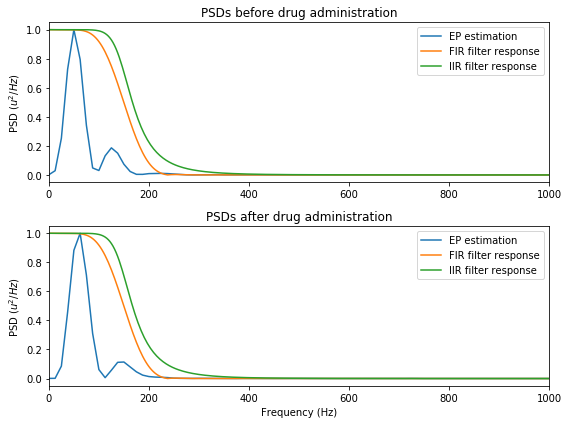

In [20]:
# Comparison between PSDs and filter response
plt.figure(figsize = (8,6))
plt.subplot(211)
plt.plot(f,P_ML_before/np.max(P_ML_before))
plt.plot(w_FIR,abs(h_FIR))
plt.plot(w_IIR,abs(h_IIR))
plt.xlim(0,1000)
plt.ylabel(r'PSD ($u^2/Hz$)')
plt.title('PSDs before drug administration')
plt.legend(['EP estimation','FIR filter response','IIR filter response'])
plt.subplot(212)
plt.plot(f,P_ML_after/np.max(P_ML_after))
plt.plot(w_FIR,abs(h_FIR))
plt.plot(w_IIR,abs(h_IIR))
plt.xlim(0,1000)
plt.legend(['EP estimation','FIR filter response','IIR filter response'])
plt.title('PSDs after drug administration')
plt.ylabel(r'PSD ($u^2/Hz$)')
plt.xlabel('Frequency (Hz)')
plt.tight_layout()

#### 3.2.3. Signal filtering

Finally, once the filter has been designed, you should **filter the individual EPs with the two filters** and **compare the results of the filtered signals**, both in time and frequency, with the EP ML estimator. **Analyze the obtained results.**

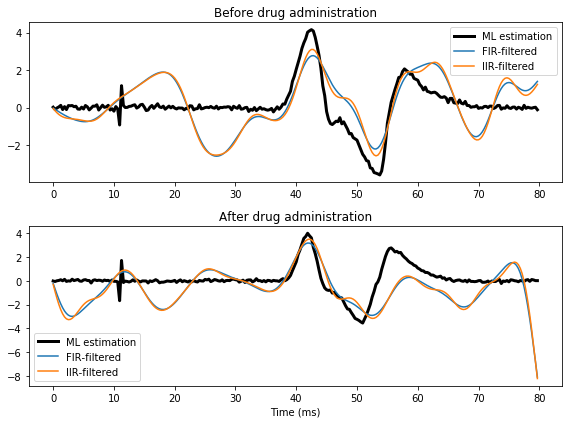

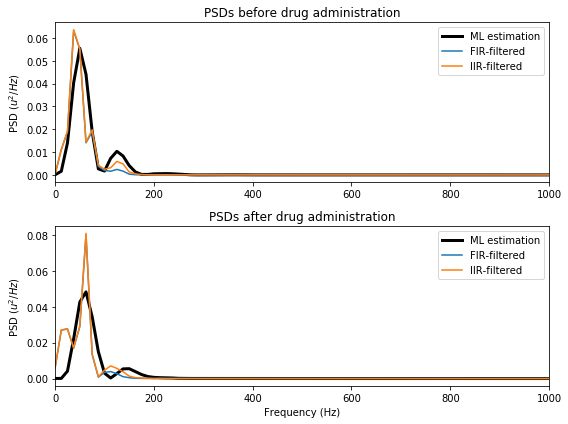

In [21]:
# Filtering of the EP before drug administration
ep_before_FIR = sg.filtfilt(fir_filter, 1, ep_ind_before)
ep_before_IIR = sg.filtfilt(b_IIR, a_IIR, ep_ind_before)

# Filtering of the EP after drug administration
ep_after_FIR = sg.filtfilt(fir_filter, 1, ep_ind_after)
ep_after_IIR = sg.filtfilt(b_IIR, a_IIR, ep_ind_after)

# PSD of the filtered signals
f,P_ind_before_FIR = sg.welch(ep_before_FIR, window='hamming', fs=fs)
_,P_ind_before_IIR = sg.welch(ep_before_IIR, window='hamming', fs=fs)

_,P_ind_after_FIR = sg.welch(ep_after_FIR, window='hamming', fs=fs)
_,P_ind_after_IIR = sg.welch(ep_after_IIR, window='hamming', fs=fs)

# Plots (comparison in time)
plt.figure(figsize = (8,6))
plt.subplot(211)
plt.plot(t_singleEP,sep_ml_before,'k',linewidth = 3)
plt.plot(t_singleEP,ep_before_FIR)
plt.plot(t_singleEP,ep_before_IIR)
plt.title('Before drug administration')
plt.legend(['ML estimation','FIR-filtered','IIR-filtered'])
plt.subplot(212)
plt.plot(t_singleEP,sep_ml_after,'k',linewidth = 3)
plt.plot(t_singleEP,ep_after_FIR)
plt.plot(t_singleEP,ep_after_IIR)
plt.xlabel('Time (ms)')
plt.title('After drug administration')
plt.legend(['ML estimation','FIR-filtered','IIR-filtered'])
plt.tight_layout()

# Plots (comparison in frequency)
plt.figure(figsize = (8,6))
plt.subplot(211)
plt.plot(f,P_ML_before,'k',linewidth = 3)
plt.plot(f,P_ind_before_FIR)
plt.plot(f,P_ind_before_IIR)
plt.xlim(0,1000)
plt.ylabel(r'PSD ($u^2/Hz$)')
plt.title('PSDs before drug administration')
plt.legend(['ML estimation','FIR-filtered','IIR-filtered'])
plt.subplot(212)
plt.plot(f,P_ML_after,'k',linewidth = 3)
plt.plot(f,P_ind_after_FIR)
plt.plot(f,P_ind_after_IIR)
plt.xlim(0,1000)
plt.legend(['ML estimation','FIR-filtered','IIR-filtered'])
plt.title('PSDs after drug administration')
plt.ylabel(r'PSD ($u^2/Hz$)')
plt.xlabel('Frequency (Hz)')
plt.tight_layout()

## Exercise 4: Time-Frequency Analysis

Physiological signals are generally **not stationary**. That means that the spectral content does not remain constant throughout the observation window. In order to perform a proper spectral analysis, we have to use methods that allow us to track the spectral content throughout the observation window. 

In class we have seen that one of the most used methods is the ***Short Time Fourier Transform (STFT)***. The squared module, normalized by the number of samples, of the STFT results in the **spectrogram**. 

In this section we are going to perform the time-frequency analysis of a synthetic signal (*chirp*) and a real EEG signal.

### Exercise 4.1. Analysis of a synthetic signal

In this first exercise we will practice with the generation of two synthetic signals. The student must create **two *chirp*** signals that last **20 seconds**, with a sampling frequency equal to **500Hz**, and a frequency variation from **6 to 50 Hz**. The signal should have an average value of 20. The difference between the first *chirp* and the second is the **frequency variation method**: one should have **linear variation** and the other **quadratic variation**.

Finally, to compare the results, two types of spectrograms must be obtained, a **wideband** and a **narrowband** one.

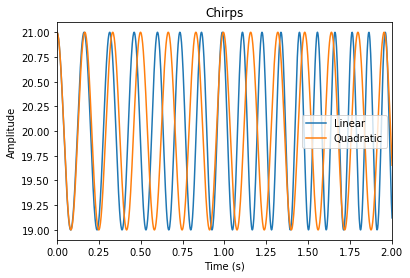

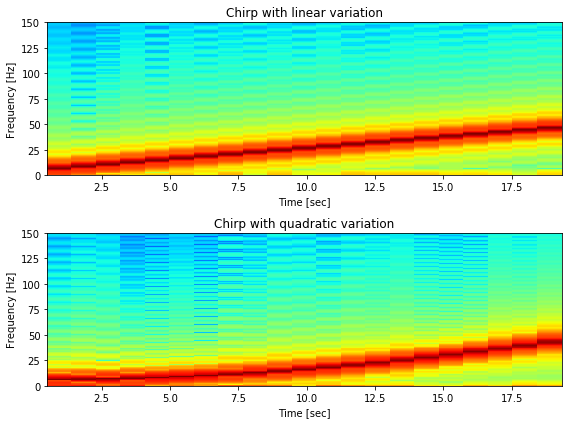

In [22]:
# Compute a times vector that lasts 20 seconds with fs=500
fs_chirp = 500
t_chirp = np.arange(0, 20, 1/fs_chirp)

# Compute both chirps
y_linear = 20+sg.chirp(t_chirp, f0=6, f1=50, t1=20, method='linear')
y_quadratic = 20+sg.chirp(t_chirp, f0=6, f1=50, t1=20, method='quadratic')

# Plot of both signals
plt.figure()
plt.plot(t_chirp,y_linear)
plt.plot(t_chirp,y_quadratic)
plt.xlim(0,2)
plt.title('Chirps')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(['Linear','Quadratic'])

# Compute the spectrograms
nperseg_spectrograms=512
f,tt,Sxx_linear = sg.spectrogram(y_linear, fs = fs_chirp, nperseg=nperseg_spectrograms)
_,_,Sxx_quadratic = sg.spectrogram(y_quadratic, fs = fs_chirp, nperseg=nperseg_spectrograms)

plt.figure(figsize = (8,6))
plt.subplot(211)
plt.pcolormesh(tt,f,10*np.log(Sxx_linear),cmap='jet')
plt.ylim((0,150))
plt.title('Chirp with linear variation')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.subplot(212)
plt.pcolormesh(tt,f,10*np.log(Sxx_quadratic),cmap='jet')
plt.ylim((0,150))
plt.title('Chirp with quadratic variation')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.tight_layout()

### Exercise 4.2. Time-Frequency Analysis of EEG

In this exercise we will work with a signal that is richer in terms of spectral content variation, the **EEG signal**. We are going to use a recorded EEG signal channel, which can be found in the *eeg_theme3.txt* file. Load this signal and get an estimate of the **PSD using a Welch periodgram**. Check the power in the brain wave bands. 

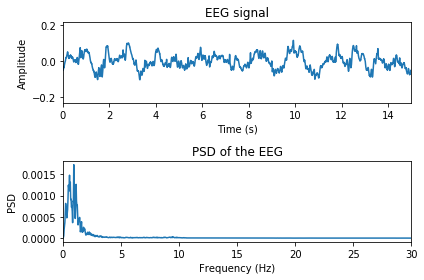

In [23]:
# Load EEG signal
eeg = np.loadtxt('eeg_tema3.txt')
fs_eeg = 250   # Sampling rate of the signal
t_eeg = np.arange(len(eeg))/fs_eeg    # Time vector for the signal.
eeg = sg.detrend(eeg)

# Compute its PSD
f_eeg,P_eeg = sg.welch(eeg,fs=fs_eeg,window='hamming',nperseg = len(eeg)/8)

# Plots
plt.figure()
plt.subplot(211)
plt.plot(t_eeg,eeg)
plt.title('EEG signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0,15)
plt.subplot(212)
plt.plot(f_eeg,P_eeg)
plt.title('PSD of the EEG')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.xlim(0,30)
plt.tight_layout()

The EEG signal is clearly non-stationary, so the estimation of the power in the frequency bands of the different waves would correspond to an average of the powers at the different instants of time. It is expected that the powers will change over the course of the recording in the different bands. 

To solve this problem, **compute the spectrogram of the EEG signal**. Change the spectrogram parameters to get a **wideband** spectrogram and a **narrowband** spectrogram.

Text(0.5, 1.0, 'Spectrogram of an EEG signal')

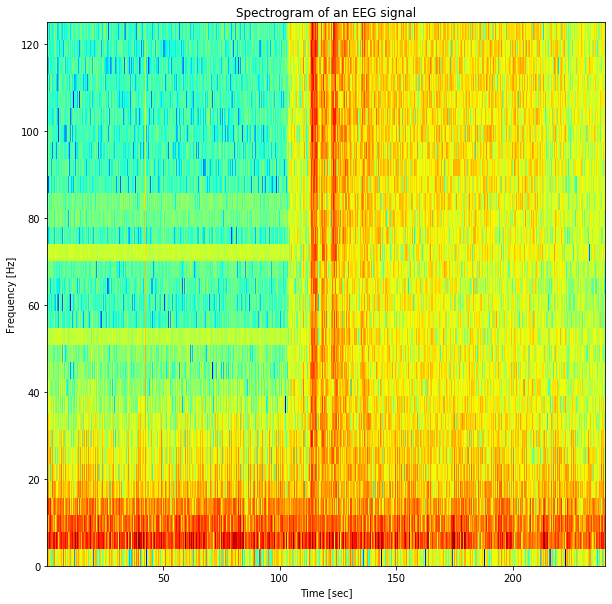

In [24]:
# Compute the spectrogram of the EEG
f,tt,Sxx_eeg = sg.spectrogram(eeg, fs = fs_eeg, nperseg=64)

# Plot of the spectrogram
plt.figure(figsize = (10,10))

plt.pcolormesh(tt,f,10*np.log(Sxx_eeg),cmap='jet')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of an EEG signal')